In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims

Using TensorFlow backend.


Enumerate all layers in the model and print the output size or feature map size for each convolutional layer as well as the layer index in the model.

In [2]:
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)











1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
11 block4_conv1 (?, 28, 28, 512)
12 block4_conv2 (?, 28, 28, 512)
13 block4_conv3 (?, 28, 28, 512)
15 block5_conv1 (?, 14, 14, 512)
16 block5_conv2 (?, 14, 14, 512)
17 block5_conv3 (?, 14, 14, 512)


Load image

In [0]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

In [0]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

In [0]:
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

We Design a new model that is a subset of the layers in the full VGG16 model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer, which we know would be the activation of the layer or the feature map.

For example, after loading the VGG model, we can define a new model that outputs a feature map from the some convolutional layer as follows.

In [6]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# get feature map for each hidden layer
feature_maps = model.predict(img)

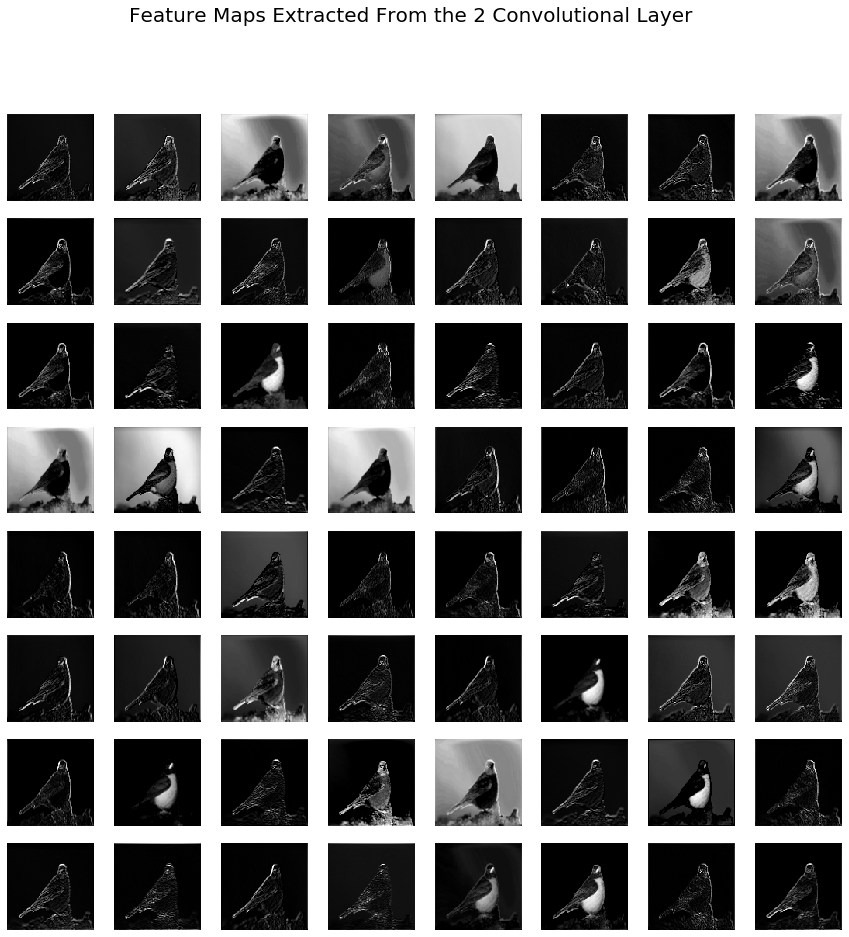

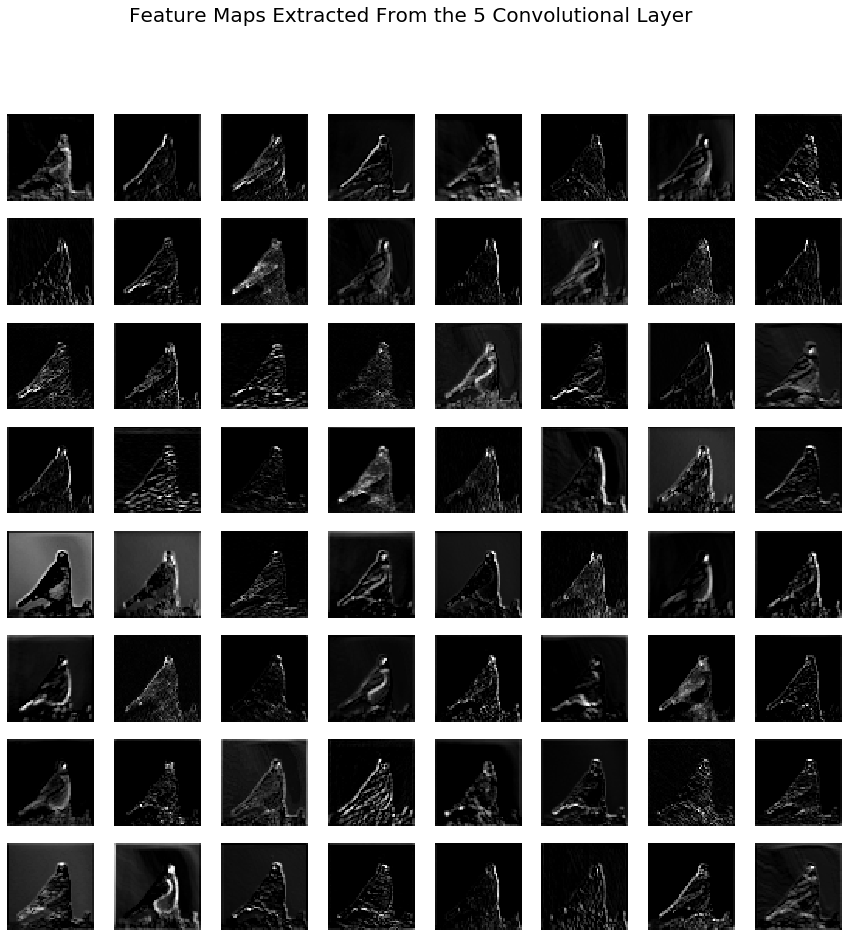

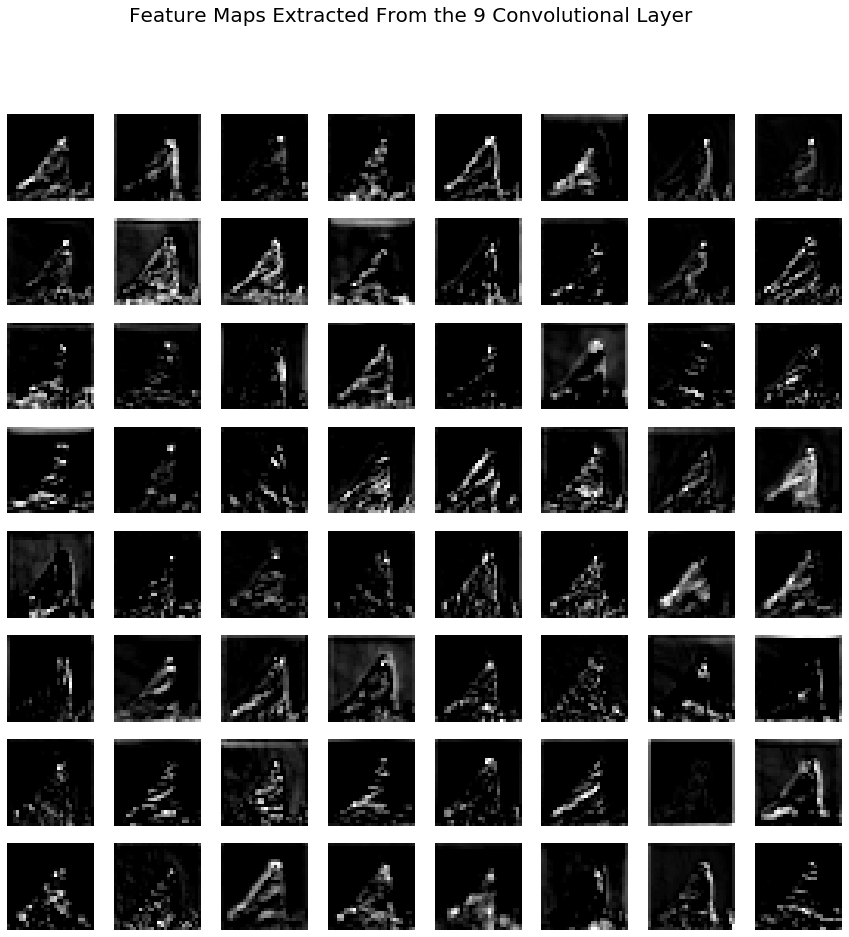

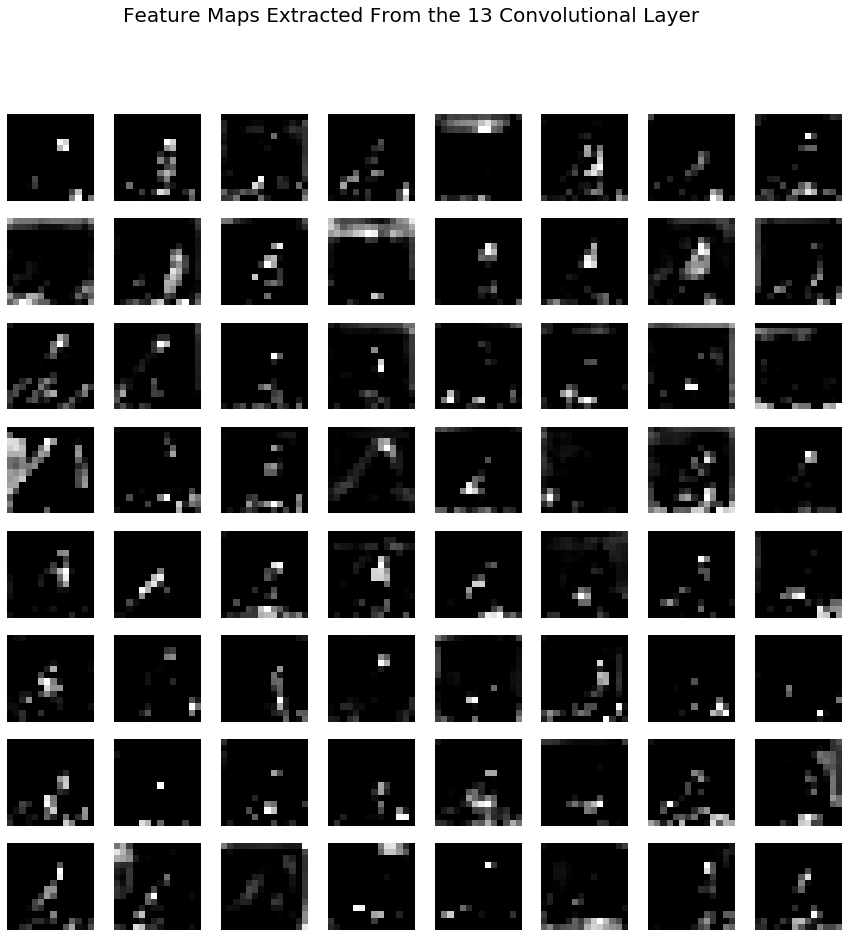

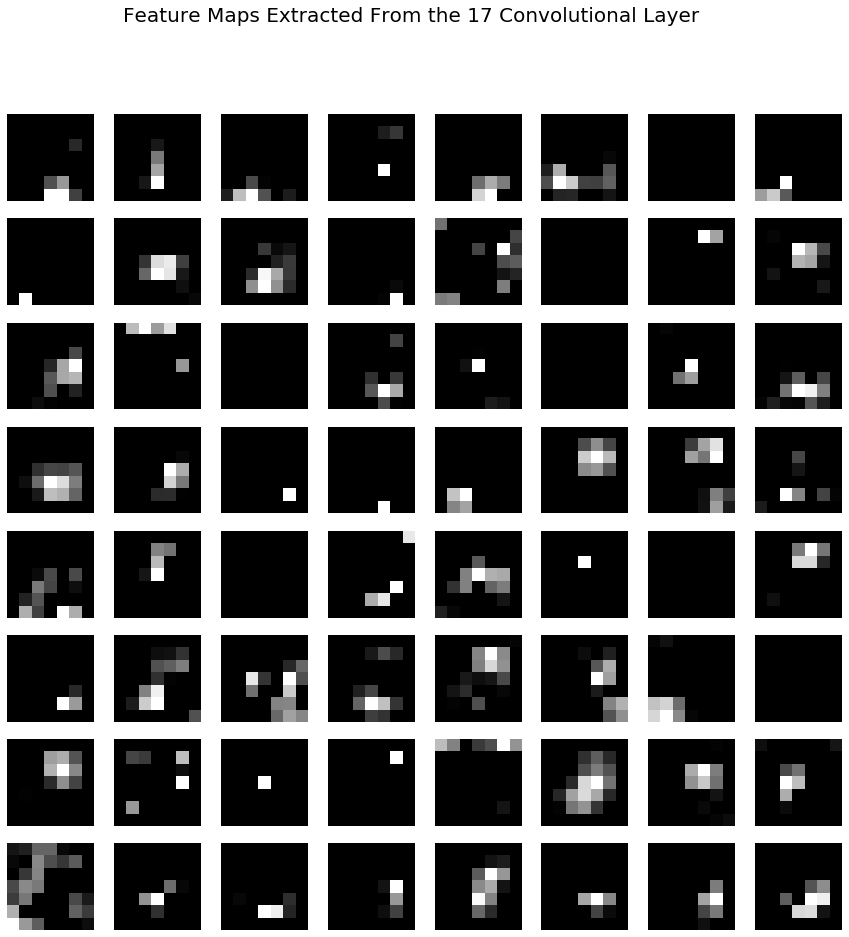

In [17]:
# plot all 64 maps in an 8x8 squares
square = 8
i = 0
for fmap in feature_maps:
  plt.figure(figsize=(15,15))
  idx = 1
  for _ in range(square):
	  for _ in range(square):
		  # specify subplot and turn of axis
		  plt.subplot(square, square, idx)
		  plt.axis('off')
		  # plot filter channel in grayscale
		  plt.imshow(fmap[0, :, :, idx-1], cmap='gray')
		  idx += 1
  # show the figure
  plt.suptitle('Feature Maps Extracted From the '+str(ixs[i])+' Convolutional Layer', fontsize=20)
  plt.show()
  print('\n========================================================================================================\n')
  i += 1